# Simple instrumentral

```bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20221128_124100_reaching_go_spout_nov22.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20221128_124100_reaching_go_spout_nov22"
```

Quick analysis of instrumental reaching

In [1]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *



### Variables

In [2]:
import pandas as pd

trial_window = [-2000, 6000] # in ms

# time limit around trigger to perform an event
# determine successful trials
timelim = [0, 2000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder, _ = os.path.split(os.path.split(os.getcwd())[0])

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = os.path.join(basefolder,'params\\tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\photometry'
photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\kms_pyphotometry'
video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'

In [3]:
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)
tasks


,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


In [4]:
photo_root_dir = 'T:\\Data\\head-fixed\\pyphotometry\\data'
pycontrol_root_dir = 'T:\\Data\\head-fixed\\pycontrol'

root_folders = [photo_root_dir, pycontrol_root_dir]
horizontal_folder_pycontrol = 'T:\\Data\\head-fixed\\test_folder\\pycontrol'
horizontal_folder_photometry = 'T:\\Data\\head-fixed\\test_folder\\photometry'

copy_files_to_horizontal_folders(
    root_folders, horizontal_folder_pycontrol, horizontal_folder_photometry)


### Create an experiment object


In [5]:
# Folder of a full experimental batch, all animals included

# Enter absolute path like this
# pycontrol_files_path = r'T:\Data\head-fixed\test_folder\pycontrol'

# or this if you want to use data from the sample_data folder within the package
pycontrol_files_path = os.path.join(basefolder, 'sample_data/pycontrol')
pycontrol_files_path = r'T:\Data\head-fixed\kms_pycontrol'

# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(pycontrol_files_path, update = True) #TODO

# Only use if the Experiment cohort as been processed by trials before
# TODO: assess whether this can be removed or not
exp_cohort.by_trial = True


Saved sessions loaded from: sessions.pkl


## Select sessions

In [6]:
ss = exp_cohort.sessions

ss_ = [this_ss for this_ss in ss 
    if this_ss.subject_ID in [313, 314, 315, 316, 317, 318] 
    and this_ss.experiment_name == 'reaching_go_spout_nov22']
ss_


In [7]:
exp_cohort.sessions = ss_

In [8]:
ss_


# SLOW 3m

In [9]:

# # Process the whole experimental folder by trials

# exp_cohort.process_exp_by_trial(
#     trial_window, timelim, tasksfile, blank_spurious_event='spout', blank_timelim=[0, 65])
#     # not working

# # Find if there is a matching photometry file and if it can be used:
# # rsync synchronization pulses matching between behaviour and photometry

# # Find if there is a matching photometry file:
# exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# # rsync synchronization pulses matching between behaviour and photometry
# exp_cohort.sync_photometry_files(2)

# # Find matching videos
# exp_cohort.match_sessions_to_files(video_dir, ext='mp4')

# # FInd matching DeepLabCut outputs files
# exp_cohort.match_sessions_to_files(video_dir, ext='h5', verbose=True)


# # exp_cohort.save()


In [10]:
exp_cohort.subject_IDs


[313, 314, 315, 316, 317, 318]

In [11]:
# Many combinations possible
conditions_dict0 = {'trigger': 'busy_win', 'valid': True}


# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict0]
# Aliases for conditions
cond_aliases = [
    'any_trial',
]

# Groups as a list of lists
groups = None

# right_handed = [281]
# groups = [[280, 282, 299, 300, 301],\
#     [284, 285, 296, 297, 306, 307]]
# Window to exctract (in ms)


In [12]:
exp_cohort.sessions[0].times.keys()

dict_keys(['waiting_for_spout', 'short_break', 'busy_win', 'button_release', 'US_delay_timer', 'CS_offset_timer', 'bar_off', 'hold_timer', 'spout_off', 'busy_win_timer', 'spout_ana', 'spout_ana_off', 'bar', 'US_end_timer', 'spout', 'button_press', 'block_timer', 'rsync'])

# Session plot

I realised that this plot can never tell if a water drop was triggered by bar_off or spout.


In [13]:
exp_cohort.sessions[0].print_lines[0:30]

['13933 water_on',
 '13933 water success',
 '15734 Timestamp:0 Success:False, Light:False',
 '60835 water_on',
 '60835 water success',
 '62636 Timestamp:0 Success:False, Light:False',
 '108497 water_on',
 '108497 water success',
 '110298 Timestamp:0 Success:False, Light:False',
 '170552 water_on',
 '170552 water success',
 '172353 Timestamp:0 Success:False, Light:False',
 '209820 water_on',
 '209820 water success',
 '211621 Timestamp:0 Success:False, Light:False',
 '217552 water_on',
 '217552 water success',
 '218488 water_on',
 '218488 water success',
 '218892 water_on',
 '218892 water success',
 '219310 water_on',
 '219310 water success',
 '219352 Timestamp:0 Success:False, Light:False',
 '254348 water_on',
 '254348 water success',
 '256150 Timestamp:0 Success:False, Light:False',
 '256993 water_on',
 '256993 water success',
 '257286 water_on']

In [14]:
import re

re.match('abc ','abc de')

expr = '^\d+(?= ' + '.?Timestamp' + ')'
a = [re.match(expr, L) for L in exp_cohort.sessions[0].print_lines if re.match(expr , L) is not None]
int(a[0].group(0))

15734

In [17]:
exp_cohort.sessions[0].times.keys()

dict_keys(['waiting_for_spout', 'short_break', 'busy_win', 'button_release', 'US_delay_timer', 'CS_offset_timer', 'bar_off', 'hold_timer', 'spout_off', 'busy_win_timer', 'spout_ana', 'spout_ana_off', 'bar', 'US_end_timer', 'spout', 'button_press', 'block_timer', 'rsync'])

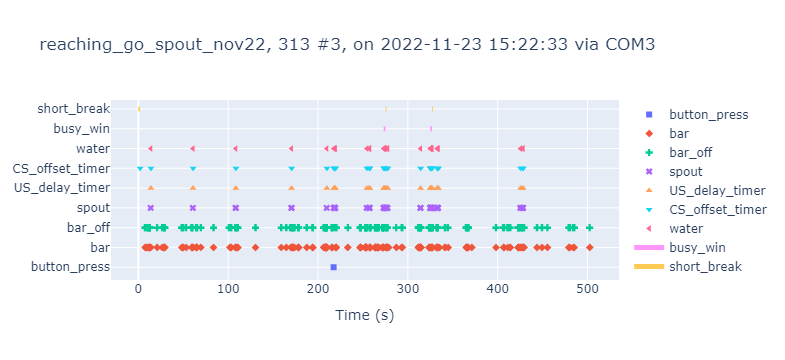

In [18]:
keys = [
        'button_press', 'bar', 'bar_off', 'spout', 'US_delay_timer', 'CS_offset_timer']
state_def = [{'name': 'waiting_for_spout', 
        'onset': 'waiting_for_spout',
        'offset': 'waiting_for_spout'},
        {'name':'busy_win', 
        'onset':'busy_win', 
        'offset':'short_break'},
        {'name':'short_break', 
        'onset':'short_break', 
        'offset':'waiting_for_spout'}]

exp_cohort.sessions[0].plot_session(keys, state_def, 
        print_expr=dict(name='water', expr='.?water success')) 


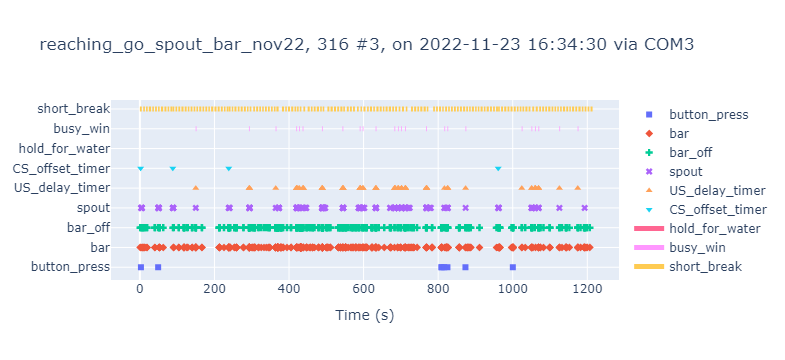

saved temp.smrx


In [ ]:
exp_cohort.sessions[0].plot_session(keys, state_def,
                                    export_son=True, son_filename='temp.smrx')


In [ ]:
for ss in exp_cohort.sessions:
    smrxname = re.sub('\.txt', f'_{ss.task_name}.smrx', ss.file_name)
    print(smrxname)


JC313L-2022-11-23-152233_reaching_go_spout_nov22.smrx
JC316L-2022-11-23-161757_reaching_go_spout_nov22.smrx
JC317L-2022-11-23-161757_reaching_go_spout_nov22.smrx
JC318L-2022-11-23-163842_reaching_go_spout_nov22.smrx
JC314L-2022-11-24-111101_reaching_go_spout_nov22.smrx
JC314L-2022-11-24-111938_reaching_go_spout_nov22.smrx
JC313L-2022-11-24-113006_reaching_go_spout_nov22.smrx
JC314L-2022-11-24-113006_reaching_go_spout_nov22.smrx
JC315L-2022-11-24-121833_reaching_go_spout_nov22.smrx
JC315L-2022-11-24-122143_reaching_go_spout_nov22.smrx




#TODO JC314L-2022-11-24-111452_reaching_go_spout_bar_nov22.smrx is broken without error

JC313L-2022-11-23-152233_reaching_go_spout_nov22.smrx


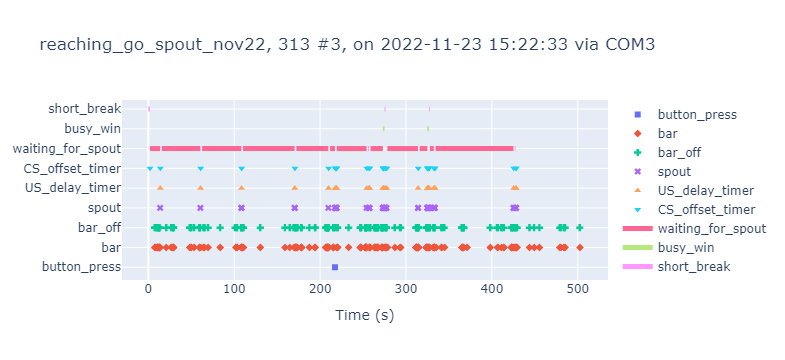

saved JC313L-2022-11-23-152233_reaching_go_spout_nov22.smrx
JC316L-2022-11-23-161757_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



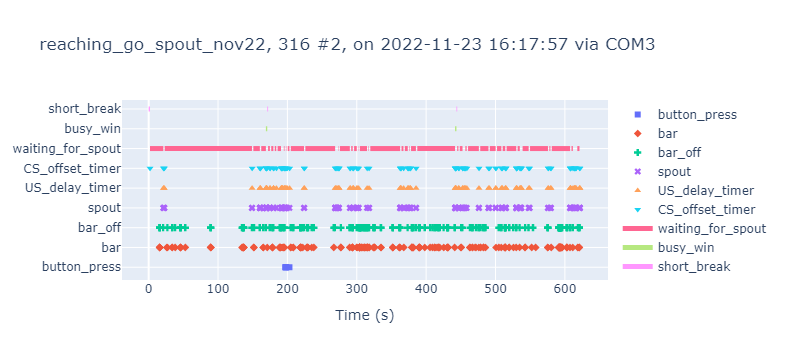

saved JC316L-2022-11-23-161757_reaching_go_spout_nov22.smrx
JC317L-2022-11-23-161757_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



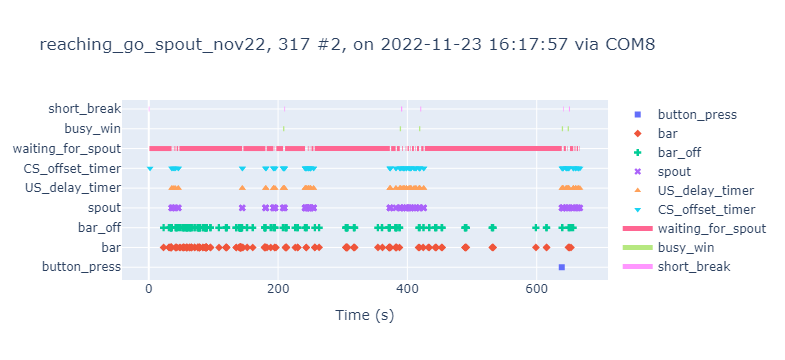

saved JC317L-2022-11-23-161757_reaching_go_spout_nov22.smrx
JC318L-2022-11-23-163842_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



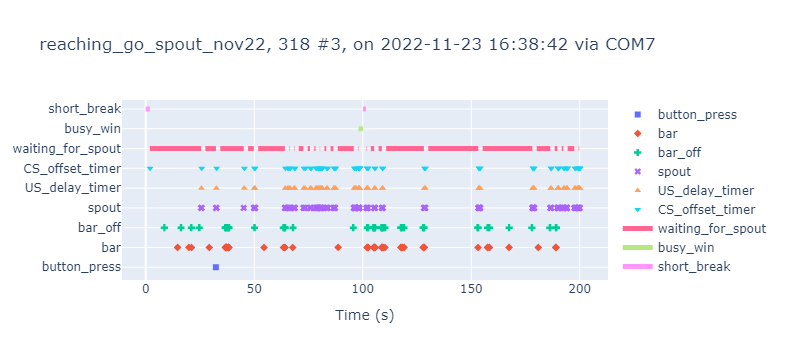

saved JC318L-2022-11-23-163842_reaching_go_spout_nov22.smrx
JC314L-2022-11-24-111101_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



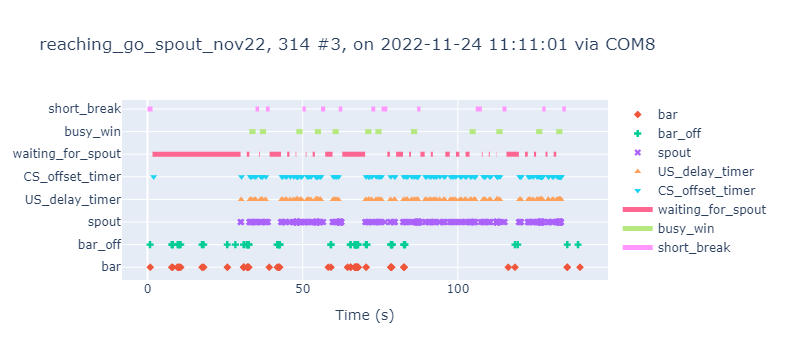

saved JC314L-2022-11-24-111101_reaching_go_spout_nov22.smrx
JC314L-2022-11-24-111938_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



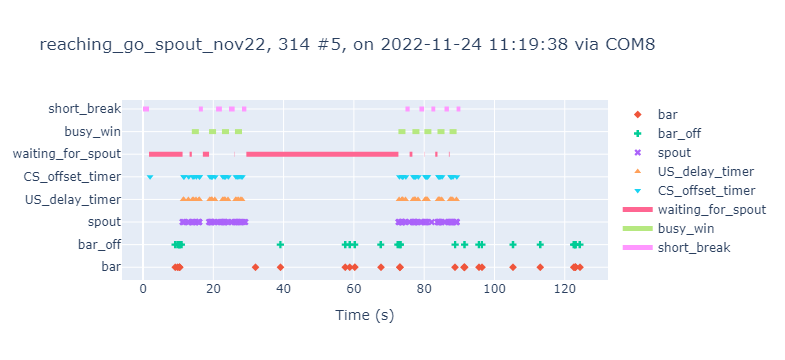

saved JC314L-2022-11-24-111938_reaching_go_spout_nov22.smrx
JC313L-2022-11-24-113006_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



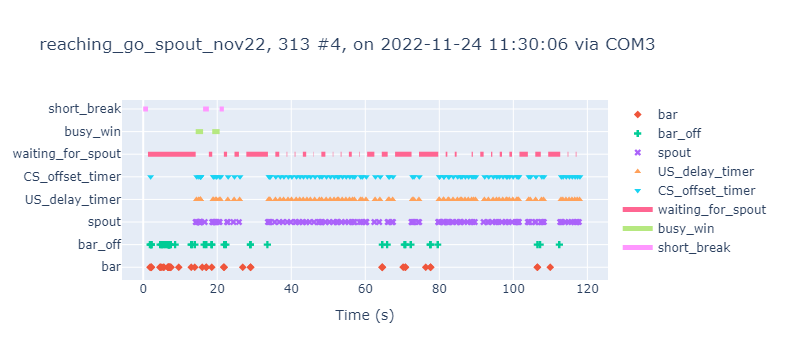

saved JC313L-2022-11-24-113006_reaching_go_spout_nov22.smrx
JC314L-2022-11-24-113006_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



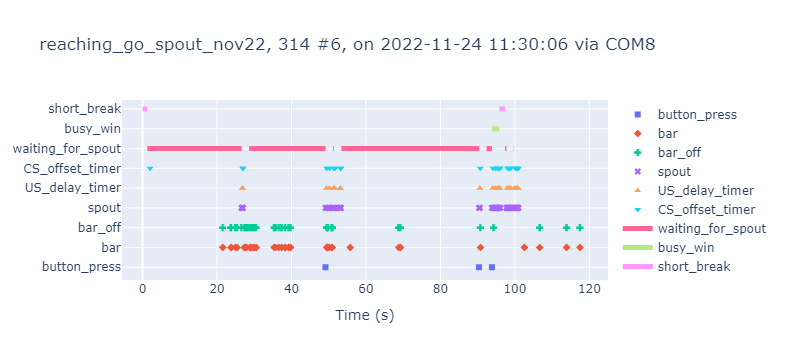

saved JC314L-2022-11-24-113006_reaching_go_spout_nov22.smrx
JC315L-2022-11-24-121833_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



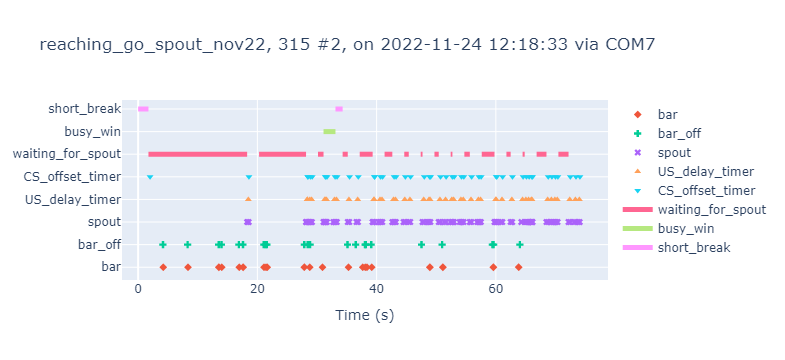

saved JC315L-2022-11-24-121833_reaching_go_spout_nov22.smrx
JC315L-2022-11-24-122143_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



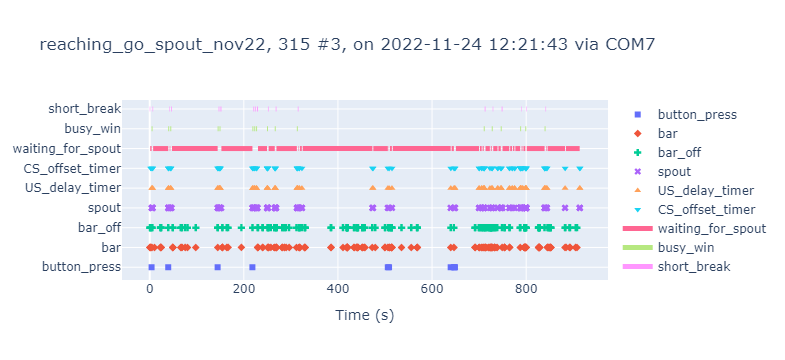

saved JC315L-2022-11-24-122143_reaching_go_spout_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_43892\4133634569.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [24]:
keys = [ 'button_press', 'bar', 'bar_off', 'spout', 'US_delay_timer', 'CS_offset_timer']
state_def = [{'name': 'waiting_for_spout', 
    'onset': 'waiting_for_spout',
    'offset': 'busy_win'},
    {'name': 'busy_win', 
    'onset': 'busy_win',
    'offset': 'short_break'},
    {'name': 'short_break', 
    'onset': 'short_break', 
    'offset': 'waiting_for_spout'}]

summary_df = pd.DataFrame()

for ss in exp_cohort.sessions:
    smrxname = re.sub('\.txt', f'_{ss.task_name}.smrx', ss.file_name)
    print(smrxname)

    ss.plot_session(
        keys, state_def, export_son=True, son_filename= smrxname)

    summary_df = summary_df.append({
        'file':ss.file_name,
        'task':ss.task_name,
        'spout': len(ss.times['spout']),
        'busy_win': len(ss.times['busy_win'])},
        ignore_index=True)


In [25]:

summary_df


,file,task,spout,busy_win
0,JC313L-2022-11-23-152233.txt,reaching_go_spout_nov22,53,15
1,JC316L-2022-11-23-161757.txt,reaching_go_spout_nov22,179,48
2,JC317L-2022-11-23-161757.txt,reaching_go_spout_nov22,204,33
3,JC318L-2022-11-23-163842.txt,reaching_go_spout_nov22,152,26
4,JC314L-2022-11-24-111101.txt,reaching_go_spout_nov22,390,28
5,JC314L-2022-11-24-111938.txt,reaching_go_spout_nov22,112,10
6,JC313L-2022-11-24-113006.txt,reaching_go_spout_nov22,131,32
7,JC314L-2022-11-24-113006.txt,reaching_go_spout_nov22,54,7
8,JC315L-2022-11-24-121833.txt,reaching_go_spout_nov22,94,16
9,JC315L-2022-11-24-122143.txt,reaching_go_spout_nov22,227,37
